### Netflix Data

Import Packages

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

In [3]:
#read the data in from my public github account
temp = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Netflix%20Project/ViewingActivity.csv')
temp.head(2)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Dad,2022-05-18 05:21:42,00:54:45,NaN,Ozark: Season 4: Mud (Episode 13),NaN,Amazon FTVET31DOVI2020 Smart TV,00:54:50,00:54:50,US (United States)
1,Dad,2022-05-18 04:31:07,00:50:33,NaN,Ozark: Season 4: Trouble The Water (Episode 12),NaN,Amazon FTVET31DOVI2020 Smart TV,00:50:38,00:50:38,US (United States)


In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45266 entries, 0 to 45265
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             45266 non-null  object
 1   Start Time               45266 non-null  object
 2   Duration                 45266 non-null  object
 3   Attributes               12182 non-null  object
 4   Title                    45266 non-null  object
 5   Supplemental Video Type  1006 non-null   object
 6   Device Type              45266 non-null  object
 7   Bookmark                 45266 non-null  object
 8   Latest Bookmark          45266 non-null  object
 9   Country                  45266 non-null  object
dtypes: object(10)
memory usage: 3.5+ MB


In [5]:
#change my duration times integers
temp["Hours"]= temp["Duration"].str.slice(0, 2).astype(int) * 60
temp["Minutes"]= temp["Duration"].str.slice(3, 5).astype(int)
temp["Seconds"] = ((temp["Duration"].str.slice(6, 8)).astype(int) / 60) #* 100
temp["Duration2"] = (temp['Hours'] + temp["Minutes"] + temp["Seconds"]).round(2)

In [6]:
temp.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Hours,Minutes,Seconds,Duration2
0,Dad,2022-05-18 05:21:42,00:54:45,NaN,Ozark: Season 4: Mud (Episode 13),NaN,Amazon FTVET31DOVI2020 Smart TV,00:54:50,00:54:50,US (United States),0,54,0.75,54.75


In [7]:
# #change my watch times to date/time format
df = temp
df['time'] = df['Duration'].apply(lambda x : ''.join(x.split(':', 1)[1:]))
df['percent'] = df['time'].apply(lambda x : x.split(':')[1])
df['percent'] = (df['percent'].astype(int) / 60) * 100
df['percent'] = df['percent'].astype(int)
df['Duration Minutes'] = df['time'].apply(lambda x : str(x).split(':')[0]) + '.' + df['percent'].astype(str)
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Hours,Minutes,Seconds,Duration2,time,percent,Duration Minutes
0,Dad,2022-05-18 05:21:42,00:54:45,NaN,Ozark: Season 4: Mud (Episode 13),NaN,Amazon FTVET31DOVI2020 Smart TV,00:54:50,00:54:50,US (United States),0,54,0.75,54.75,54:45,75,54.75


In [8]:
#temp['Minutes Watched'] = temp['Start Time'].astype(float)
df['Duration Minutes'] = df['Duration Minutes'].astype(float)
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['day_of_week']=df['Start Time'].dt.day_name()
df['Date']=df['Start Time'].dt.date
df['month']=df['Start Time'].dt.month_name()
df['year']=df['Start Time'].dt.year
df['day']=df['Start Time'].dt.day
df['week']=df['Start Time'].dt.week
df['month_of_year']=df['Start Time'].dt.month
df['quarter']=df['Start Time'].dt.quarter
df['weekday']=df['Start Time'].dt.weekday
df['day_of_year']=df['Start Time'].dt.dayofyear
df['Duration'] = pd.to_datetime(df['Duration']).dt.time
df.head(10)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,...,day_of_week,Date,month,year,day,week,month_of_year,quarter,weekday,day_of_year
0,Dad,2022-05-18 05:21:42,00:54:45,NaN,Ozark: Season 4: Mud (Episode 13),NaN,Amazon FTVET31DOVI2020 Smart TV,00:54:50,00:54:50,US (United States),...,Wednesday,2022-05-18,May,2022,18,20,5,2,2,138
1,Dad,2022-05-18 04:31:07,00:50:33,NaN,Ozark: Season 4: Trouble The Water (Episode 12),NaN,Amazon FTVET31DOVI2020 Smart TV,00:50:38,00:50:38,US (United States),...,Wednesday,2022-05-18,May,2022,18,20,5,2,2,138
2,Dad,2022-05-18 03:28:52,01:02:11,Autoplayed: user action: Unspecified;,Ozark: Season 4: Pound of Flesh and Still Kick...,NaN,Amazon FTVET31DOVI2020 Smart TV,01:02:00,01:02:00,US (United States),...,Wednesday,2022-05-18,May,2022,18,20,5,2,2,138
3,Dad,2022-05-18 03:28:28,00:00:12,Autoplayed: user action: None;,Season 7 Supporting Character Clip: Grace and ...,HOOK,Amazon FTVET31DOVI2020 Smart TV,00:00:12,00:00:12,US (United States),...,Wednesday,2022-05-18,May,2022,18,20,5,2,2,138
4,Dad,2022-05-18 03:26:33,00:01:48,Autoplayed: user action: None;,Season 1 Trailer: Welcome to Eden,TRAILER,Amazon FTVET31DOVI2020 Smart TV,00:01:48,00:01:48,US (United States),...,Wednesday,2022-05-18,May,2022,18,20,5,2,2,138
5,Dad,2022-05-18 03:26:18,00:00:11,Autoplayed: user action: None;,Outlander: Season 1_hook_primary_16x9,HOOK,Amazon FTVET31DOVI2020 Smart TV,00:00:11,00:00:11,US (United States),...,Wednesday,2022-05-18,May,2022,18,20,5,2,2,138
6,Dad,2022-05-18 03:26:05,00:00:10,Autoplayed: user action: None;,Season 4 Trailer: The Circle,TRAILER,Amazon FTVET31DOVI2020 Smart TV,00:00:10,00:00:10,US (United States),...,Wednesday,2022-05-18,May,2022,18,20,5,2,2,138
7,Dad,2022-05-18 03:25:24,00:00:37,Autoplayed: user action: None;,Workin' Moms: Season 1_hook_primary_16x9,HOOK,Amazon FTVET31DOVI2020 Smart TV,00:00:37,00:00:37,US (United States),...,Wednesday,2022-05-18,May,2022,18,20,5,2,2,138
8,Dad,2022-05-18 03:25:15,00:00:05,Autoplayed: user action: None;,Season 2 Moment of High Emotion Clip: Bling Em...,HOOK,Amazon FTVET31DOVI2020 Smart TV,00:00:05,00:00:05,US (United States),...,Wednesday,2022-05-18,May,2022,18,20,5,2,2,138
9,Dad,2022-05-18 01:40:02,00:01:14,Autoplayed: user action: None;,Inciting Incident Clip: Senior Year,HOOK,Netflix Windows App - Cadmium Windows Mobile,00:00:00,00:00:00,US (United States),...,Wednesday,2022-05-18,May,2022,18,20,5,2,2,138


In [9]:
df['Show'] = df['Title'].str.split(':').str[0]

df_clean = df[['Profile Name', 'Date', 'Duration2', 'Show', 'Title','Device Type', 'Country','day_of_week', 'month', 'year','Start Time']]
df_clean.head(1)

,Profile Name,Date,Duration2,Show,Title,Device Type,Country,day_of_week,month,year,Start Time
0,Dad,2022-05-18,54.75,Ozark,Ozark: Season 4: Mud (Episode 13),Amazon FTVET31DOVI2020 Smart TV,US (United States),Wednesday,May,2022,2022-05-18 05:21:42


In [10]:
df_clean.columns

Index(['Profile Name', 'Date', 'Duration2', 'Show', 'Title', 'Device Type',
       'Country', 'day_of_week', 'month', 'year', 'Start Time'],
      dtype='object')

In [11]:
df['Country'].value_counts()

US (United States)           38436
BE (Belgium)                  4837
DE (Germany)                  1437
MO (Macao)                     135
AU (Australia)                 110
FR (France)                     93
IT (Italy)                      87
GB (United Kingdom)             42
IE (Ireland)                    34
ZZ (Unknown Region)             30
NL (Netherlands)                19
CZ (Czech Republic)              5
SY (Syrian Arab Republic)        1
Name: Country, dtype: int64

In [12]:
df1 = df_clean.loc[df['Country'].isin(['US (United States)', 'BE (Belgium)', 'DE (Germany)', 'FR (France)', 'IT (Italy)', 'NL (Netherlands)', 'IE (Ireland)', 'CZ (Czech Republic)'])]
df1['Country'].value_counts()

US (United States)     38436
BE (Belgium)            4837
DE (Germany)            1437
FR (France)               93
IT (Italy)                87
IE (Ireland)              34
NL (Netherlands)          19
CZ (Czech Republic)        5
Name: Country, dtype: int64

In [13]:
df_clean.head(1)

,Profile Name,Date,Duration2,Show,Title,Device Type,Country,day_of_week,month,year,Start Time
0,Dad,2022-05-18,54.75,Ozark,Ozark: Season 4: Mud (Episode 13),Amazon FTVET31DOVI2020 Smart TV,US (United States),Wednesday,May,2022,2022-05-18 05:21:42


In [14]:
df_clean.rename(columns={'Profile Name': 'Profile_Name', 'Date': 'Date', 'Duration2': 'Duration', 'Title': 'Title', 'Device Type': 'Device_Type', 'Country': 'Country', 'day_of_week': 'day_of_week', 'month': 'month', 'year': 'year', 'Start Time': 'Start_Time'}, inplace=True)

In [15]:
df_num = df_clean.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['Duration'][:-1] # -1 means that the latest row is SalePrice
top_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There are {} strongly correlated values with Duration:\n{}".format(len(top_features), top_features))

There are 1 strongly correlated values with Duration:
Duration    1.0
Name: Duration, dtype: float64


In [16]:
dfg = df_clean.groupby('Profile_Name')['Date'].count()
dfc = df_clean.groupby('Country')['Date'].count()

<AxesSubplot:xlabel='Country'>

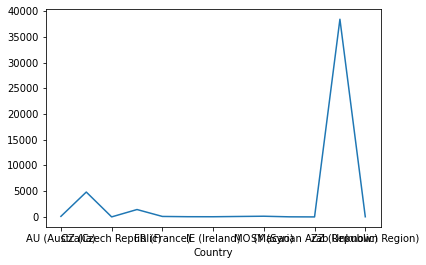

In [17]:
dfg
dfc.plot()


<AxesSubplot:title={'center':'Number of Viewings per Profile'}, xlabel='Profile_Name'>

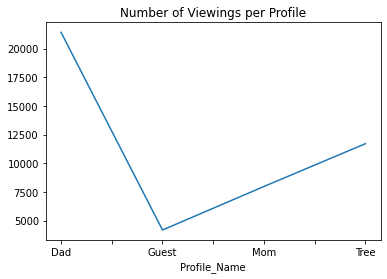

In [18]:
dfg.plot( title = "Number of Viewings per Profile")

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, 'Peppa Pig'),
  Text(0.0, 0, 'The Big Bang Theory'),
  Text(5.0, 0, 'The Big Bang Theory'),
  Text(10.0, 0, 'The Big Bang Theory'),
  Text(15.0, 0, 'The Big Bang Theory'),
  Text(20.0, 0, 'The Big Bang Theory'),
  Text(25.0, 0, 'Peppa Pig'),
  Text(30.0, 0, 'Peppa Pig'),
  Text(35.0, 0, '')])

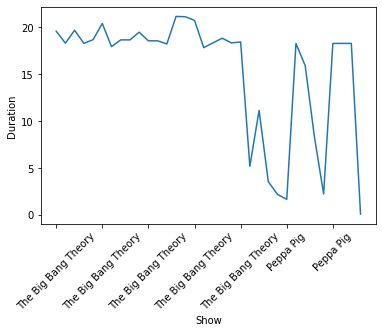

In [19]:
#show data of one show
mask1 = df_clean['Country'] == 'IE (Ireland)'
(
    df_clean[mask1]
    .set_index('Show')
    ['Duration']
    .plot()
)

plt.ylabel('Duration')
plt.xlabel('Show')
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='day_of_week'>

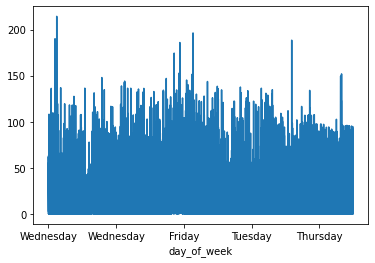

In [20]:
# basic approach to plot using matplotlib w/ chaining approach
(
    df1
    .set_index('day_of_week')
    ['Duration2']
    .plot()
)

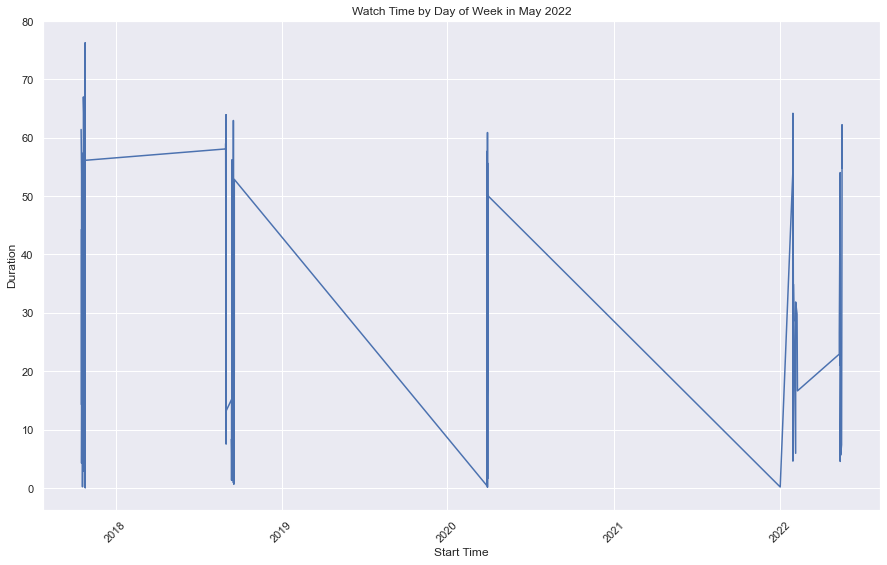

In [21]:
# check watch time for 2022
Ozarks = df_clean.loc[df_clean['Show'] == 'Ozark']
sns.set_style("whitegrid")
sns.set()
#sns.scatterplot(x = Ozarks['year'], y= Ozarks['Duration'])
Ozarks = df_clean.loc[df_clean['Show'] == 'Ozark']
(
    Ozarks
    .set_index('Date')
    #.between('2022-05-03', '2022-05-04')
    .query('Start_Time > 20100503')
    ['Duration']
    .plot(figsize=(15,9))
)
plt.ylabel('Duration')
plt.xlabel('Start Time')
plt.xticks(rotation = 45)
plt.title('Watch Time by Day of Week in May 2022')
plt.show()


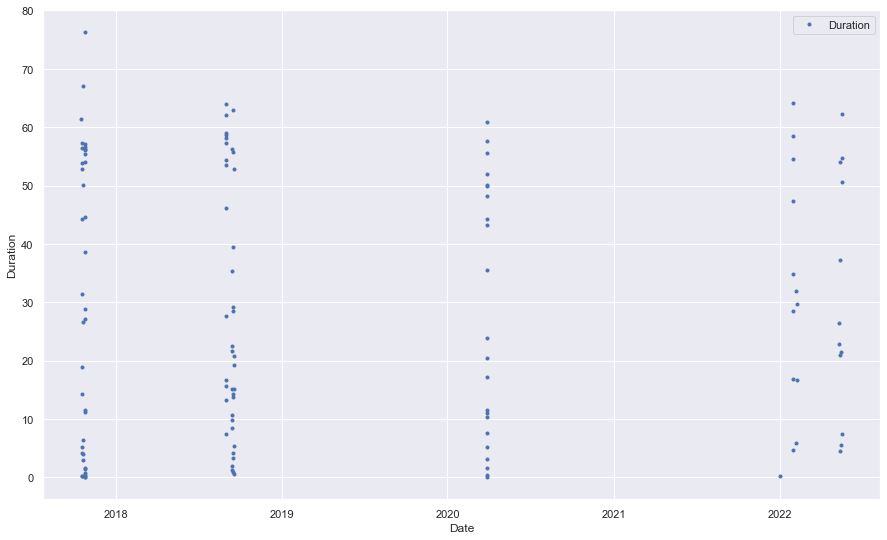

In [22]:
axes = Ozarks.plot(x='Date', y='Duration', style='.',figsize=(15,9), legend=True)
y_label = axes.set_ylabel('Duration')

In [23]:
FR = df_clean.loc[df_clean['Country'] == 'FR (France)']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


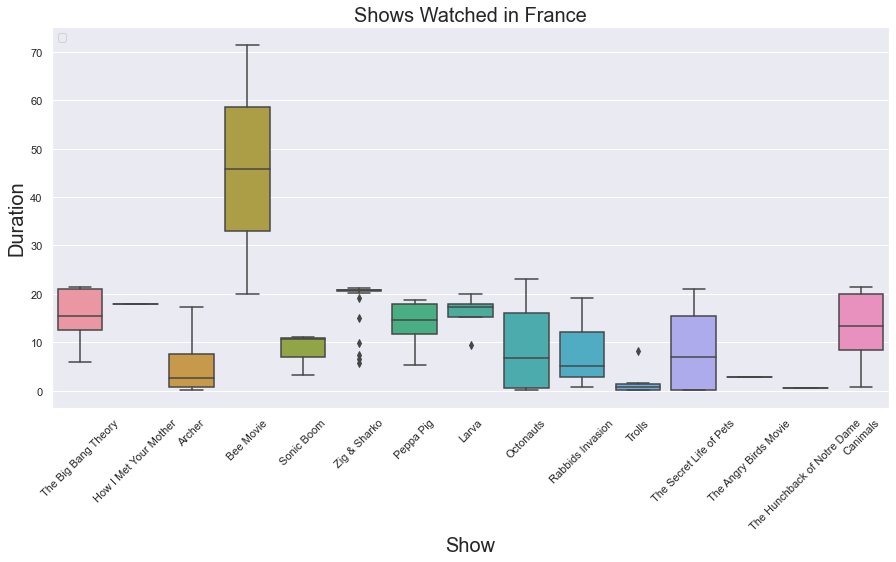

In [24]:
sns.set(rc={"figure.figsize":(15, 7)}) #width=10, #height=15
sns.boxplot(data=FR, x= 'Show', y= 'Duration',
 #hue="day_of_week",
#orient = 'h', #palette = "Set2",
 #linewidth=2.5,
 #size="Duration",
  #sizes=(50, 200),
   #alpha=0.5,
   # legend=True
   )
plt.legend(loc='upper left')
plt.ylabel('Duration', fontsize=20)
plt.xlabel('Show', fontsize=20)
plt.xticks(rotation = 45)
plt.title('Shows Watched in France', fontsize=20)
plt.savefig("Seaborn_scatterplot.png",
                    format='png',dpi=300)

In [25]:
df_clean['Show'].value_counts()

Frasier                            2563
How I Met Your Mother              1368
Law & Order                        1055
American Dad!                      1054
Jake and the Never Land Pirates     966
                                   ... 
Aqua Teen Hunger Force                1
Jeopardy!                             1
Hal Sparks                            1
Sunny Bunnies                         1
Annihilation                          1
Name: Show, Length: 2509, dtype: int64

In [26]:
Frasier = df_clean.loc[df_clean['Show'] == 'Frasier']
Frasier.head(1)

,Profile_Name,Date,Duration,Show,Title,Device_Type,Country,day_of_week,month,year,Start_Time
1826,Dad,2019-11-02,14.67,Frasier,Frasier: Season 10: Proxy Prexy (Episode 3),Roku Dallas Set Top Box (Roku 4),US (United States),Saturday,November,2019,2019-11-02 05:27:38


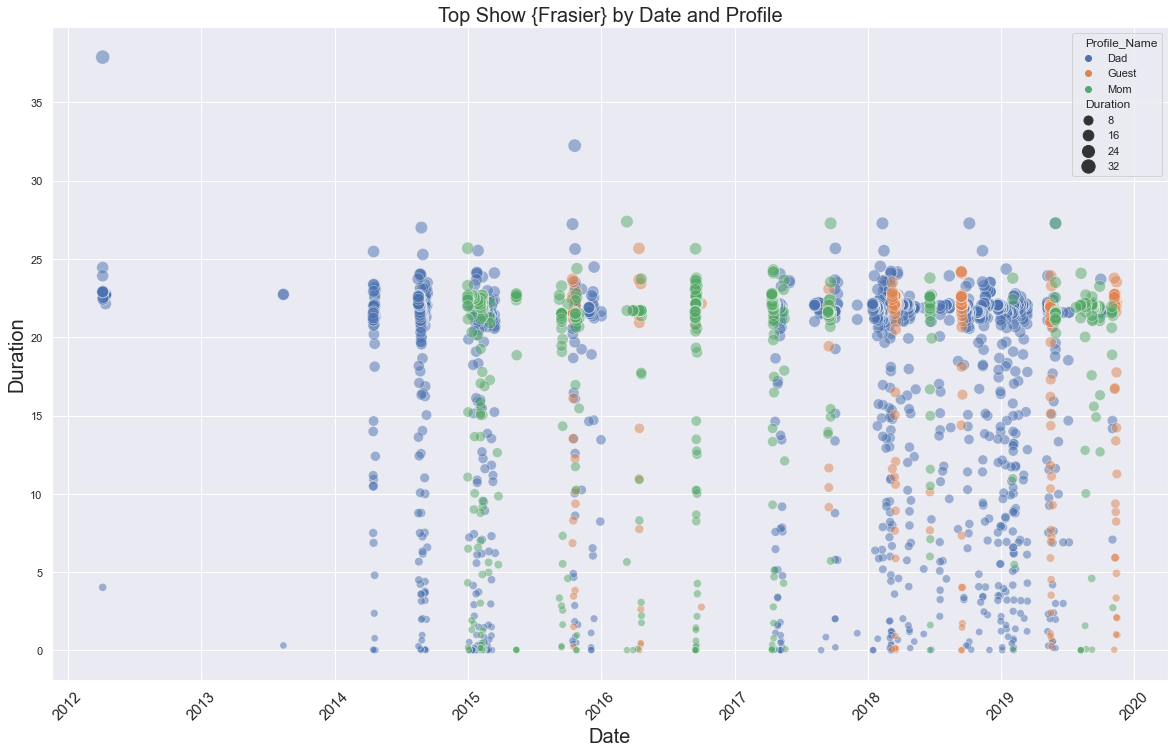

In [27]:
sns.set(rc={"figure.figsize":(20, 12)}) #width=10, #height=15
sns.scatterplot(data=Frasier, x="Date", y= 'Duration',
 hue="Profile_Name", size="Duration",
  sizes=(50, 200), alpha=0.5, legend=True)

plt.ylabel('Duration', fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.xticks(rotation = 45, fontsize = 15)
plt.title('Top Show {Frasier} by Date and Profile', fontsize=20)

plt.savefig("Seaborn_scatterplot2.png",
                    format='png',dpi=300)

In [29]:
df1.columns

Index(['Profile Name', 'Date', 'Duration2', 'Show', 'Title', 'Device Type',
       'Country', 'day_of_week', 'month', 'year', 'Start Time'],
      dtype='object')

Text(0.5, 1.0, 'Minutes by Profile')

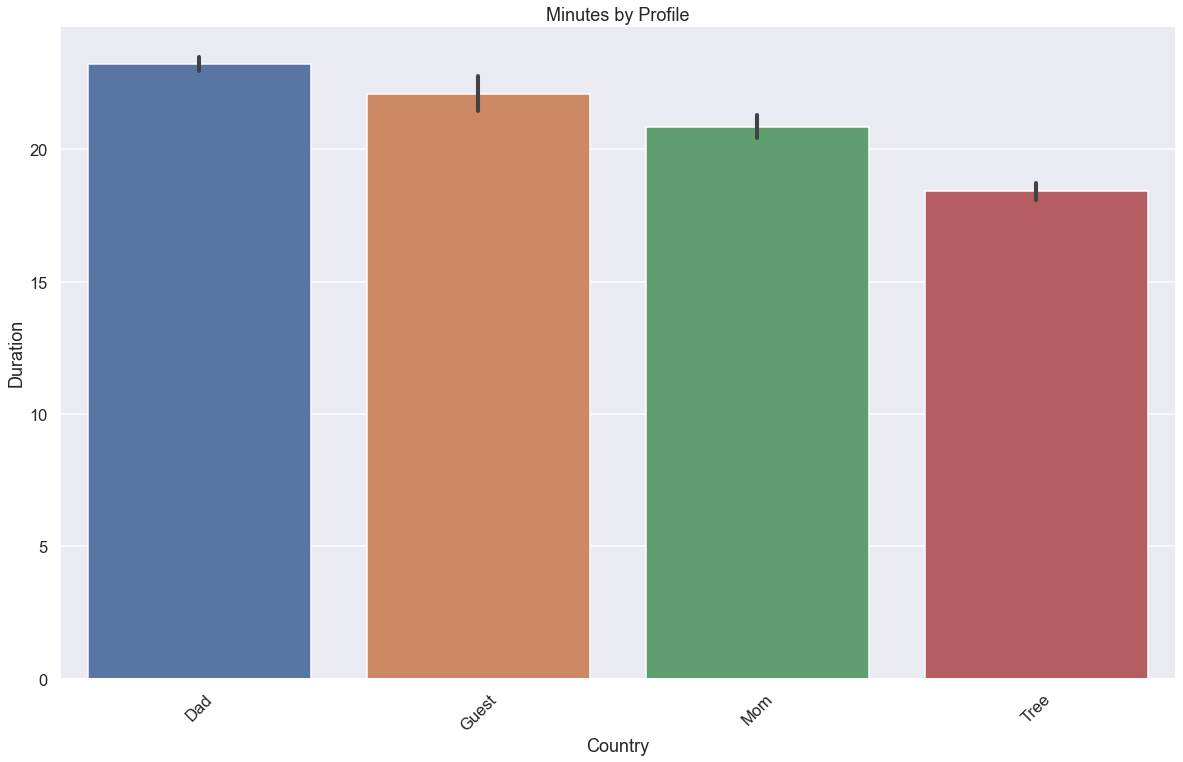

In [32]:
sns.set_context("talk")

sns.barplot( x='Profile Name', y = 'Duration2',
    data=df1)

plt.ylabel('Duration')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.title('Minutes by Profile')

Text(0.5, 1.0, 'Episodes Watched by Country')

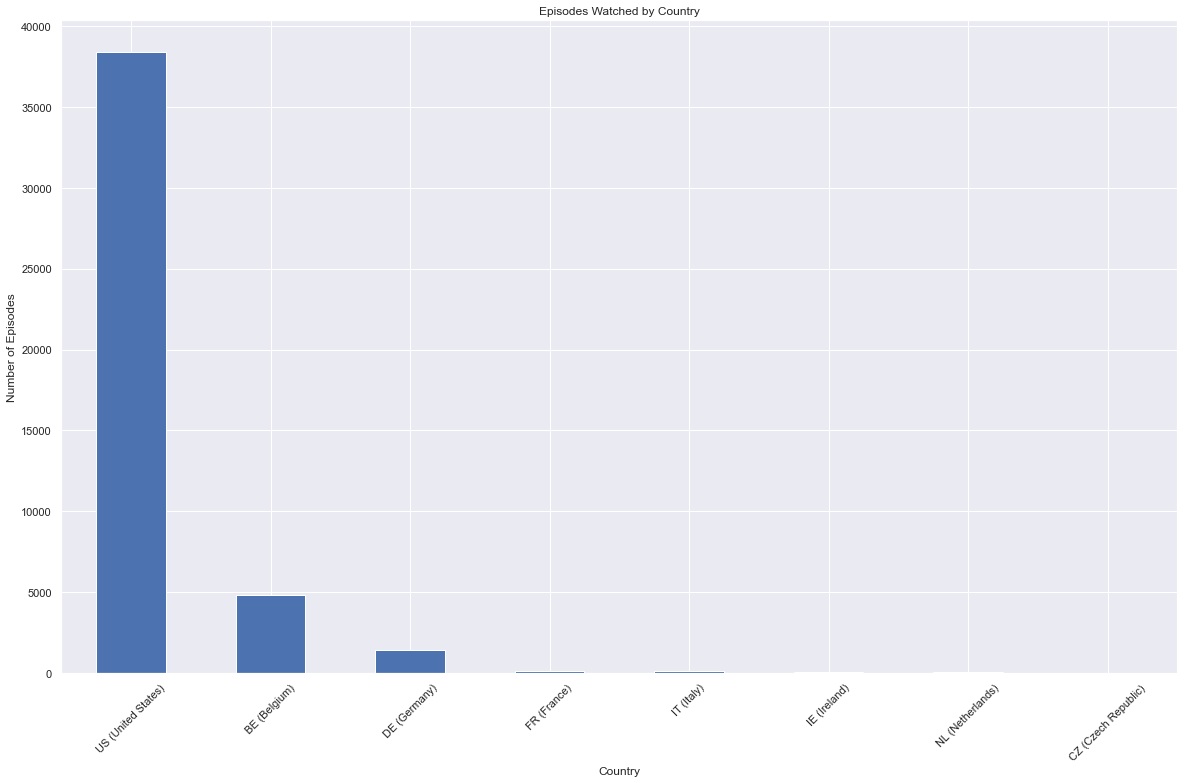

In [33]:
sns.set()
df1['Country'].value_counts().plot(kind = 'bar')
plt.ylabel('Number of Episodes')
plt.xlabel('Country')
plt.xticks(rotation = 45)
plt.title('Episodes Watched by Country')

In [ ]:
df1.columns

Index(['Profile Name', 'Date', 'Duration2', 'Title', 'Device Type', 'Country',
       'day_of_week', 'month', 'year', 'Start Time'],
      dtype='object')

In [ ]:
df.head(1)

,Profile Name,Date,Duration2,Title,Device Type,Country,day_of_week,month,year,Start Time
0,Dad,2022-05-18,54.75,Ozark: Season 4: Mud (Episode 13),Amazon FTVET31DOVI2020 Smart TV,US (United States),Wednesday,May,2022,2022-05-18 05:21:42


In [36]:
df1[['Profile Name', 'Start Time', 'Duration2', 'Title']]

,Profile Name,Start Time,Duration2,Title
0,Dad,2022-05-18 05:21:42,54.75,Ozark: Season 4: Mud (Episode 13)
1,Dad,2022-05-18 04:31:07,50.55,Ozark: Season 4: Trouble The Water (Episode 12)
2,Dad,2022-05-18 03:28:52,62.18,Ozark: Season 4: Pound of Flesh and Still Kick...
3,Dad,2022-05-18 03:28:28,0.20,Season 7 Supporting Character Clip: Grace and ...
4,Dad,2022-05-18 03:26:33,1.80,Season 1 Trailer: Welcome to Eden
...,...,...,...,...
45261,Tree,2014-10-06 00:20:53,47.53,Phineas and Ferb the Movie: Across the 2nd Dim...
45262,Tree,2014-10-05 23:54:20,21.92,Jake and the Never Land Pirates: Season 1: The...
45263,Tree,2014-10-05 23:23:33,29.15,Jake and the Never Land Pirates: Season 1: The...
45264,Tree,2014-10-05 11:36:43,2.45,Jake and the Never Land Pirates: Season 1: Hid...


In [37]:
df_clean.to_csv('df_clean.csv')